In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qadence import *

import torch
from torch.autograd import grad

### Hyperparams

In [2]:
RANDOM_STATES = [42, 1615956328, 247970482, 89419800, 71286725, 313474683, 264278394, 1471746552, 2002605652, 1217919795] #np.random.randint(0, 2**31-1, size=10) 
print("Seeds: ", RANDOM_STATES)
LEARNING_RATES = [0.1] 
K= [1] 
LAMBDA = [12] 

Seeds:  [42, 1615956328, 247970482, 89419800, 71286725, 313474683, 264278394, 1471746552, 2002605652, 1217919795]


### Inputs

In [3]:
def generate_chebyshev_grid(n, a, b, requires_grad=True): 
    k = torch.arange(n)
    chebyshev_nodes = torch.cos(torch.pi * (2*k + 1) / (2*n))  #standard Chebyshev nodes in [-1,1]
    scaled_nodes = ((chebyshev_nodes + 1) / 2) * (b - a) + a  #rescale to [a, b]
    
    return scaled_nodes.requires_grad_(requires_grad=requires_grad)

# X train
N_POINTS = 20
a = 0.0
b = 0.9
x = generate_chebyshev_grid(N_POINTS, a, b)
print(x.detach().numpy())
cp_fixed = torch.reshape(x, (N_POINTS,1))

# X test
sample_points = generate_chebyshev_grid(100, a, b, requires_grad=False).reshape(-1, 1)

[0.8986128  0.88756646 0.86574579 0.83368807 0.79218268 0.74225162
 0.68512435 0.62220754 0.55505041 0.48530659 0.41469341 0.34494959
 0.27779246 0.21487565 0.15774838 0.10781732 0.06631193 0.03425421
 0.01243354 0.0013872 ]


### Pseudo-Exhaustive search

Seed id:  0
Learning rate:  0.1
k = 1
lamb = 12
Initial angles:  [0.05815449 0.9552357  0.84251973 0.62340308 0.03134017 0.25185522
 0.84900285 0.42769536 0.66264799 0.49915205 0.01108539 0.61281218
 0.30930663 0.1378053  0.89179548 0.06291017 0.92875258 0.87050104
 0.437279   0.04036647 0.23340819 0.03249561 0.28818388 0.58193447
 0.99843565 0.7228172  0.89942082 0.0650073  0.2998242  0.97544463
 0.12358607 0.08354337 0.37753296 0.07473488 0.93190879 0.2256651
 0.30924379 0.98140105 0.70931952 0.23263911 0.25441961 0.67971803
 0.64383731 0.63580649 0.23344545 0.05258016 0.13264067 0.61243659
 0.68343022 0.15212583 0.3175678  0.43230375 0.84563053 0.47202752
 0.37290503 0.63081072 0.14444276 0.00666942 0.51456044 0.71770061
 0.5261719  0.1570535  0.08810978 0.31223868 0.26504491 0.61440828
 0.93429881 0.38427802 0.09382696 0.62548492 0.35387974 0.55729265
 0.56166106 0.67915396 0.0117009  0.47678475 0.37536703 0.70118189
 0.30905878 0.13043349 0.59777135 0.12231294 0.09930668 0.6064138

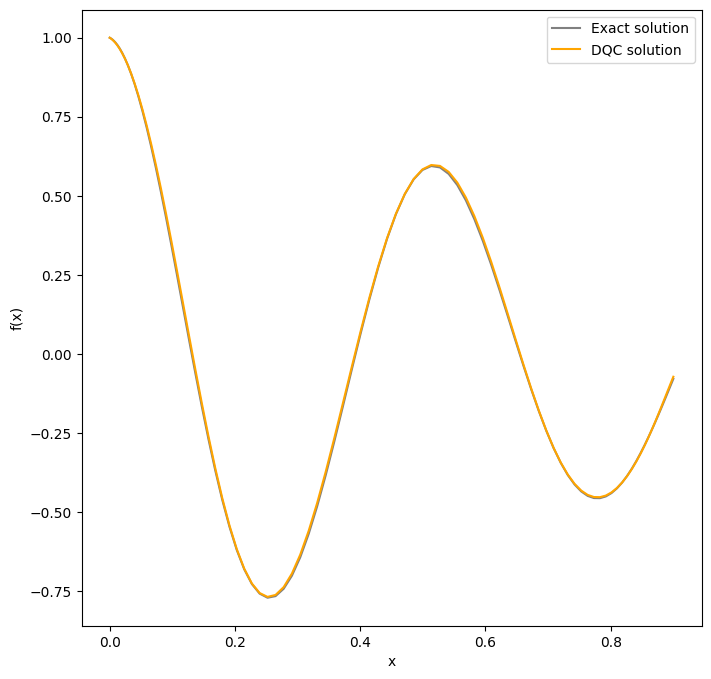

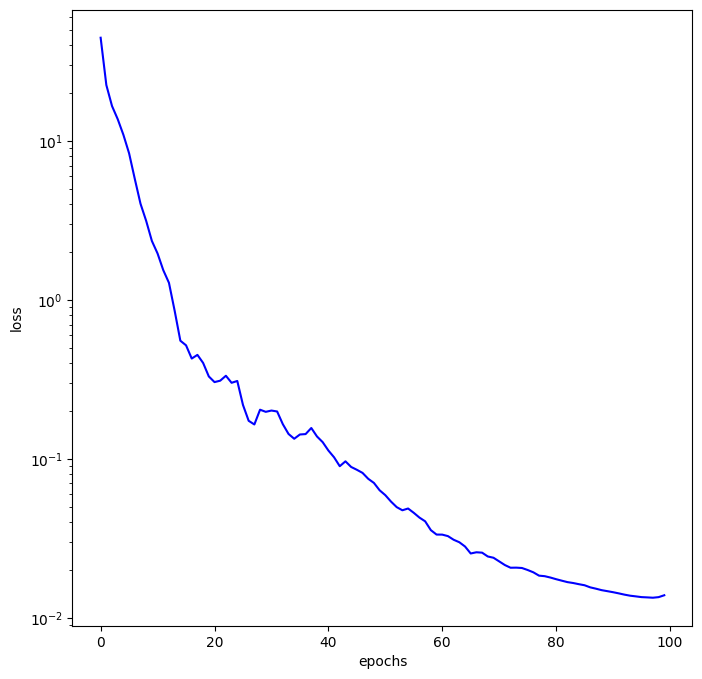

Seed id:  1
Learning rate:  0.1
k = 1
lamb = 12
Initial angles:  [0.11509135 0.02221115 0.43069277 0.27314747 0.63929503 0.77610958
 0.72483418 0.65812981 0.73800719 0.10958308 0.96348178 0.79406964
 0.65185618 0.31305863 0.05501783 0.28251609 0.56844783 0.13426407
 0.15061303 0.93361481 0.79167513 0.44485212 0.8288722  0.36073963
 0.40733067 0.42734214 0.17206301 0.19448394 0.0413348  0.80849899
 0.49609575 0.87198031 0.3949415  0.3446643  0.59257332 0.62499483
 0.10306715 0.84030487 0.73850549 0.40394903 0.12080731 0.72649254
 0.85892937 0.70277986 0.95416346 0.86274192 0.2735772  0.43361597
 0.98268494 0.24329929 0.55441653 0.94480491 0.12460364 0.9475362
 0.39488467 0.34369312 0.2787135  0.90699625 0.19563421 0.2746659
 0.18785561 0.46135441 0.37286309 0.2461782  0.28262508 0.4763519
 0.00579951 0.4637544  0.14480101 0.21707576 0.68111584 0.94612825
 0.61565223 0.34266785 0.1531805  0.84476366 0.85214649 0.94530719
 0.64765497 0.3805877  0.09533286 0.21620766 0.49045403 0.26324939


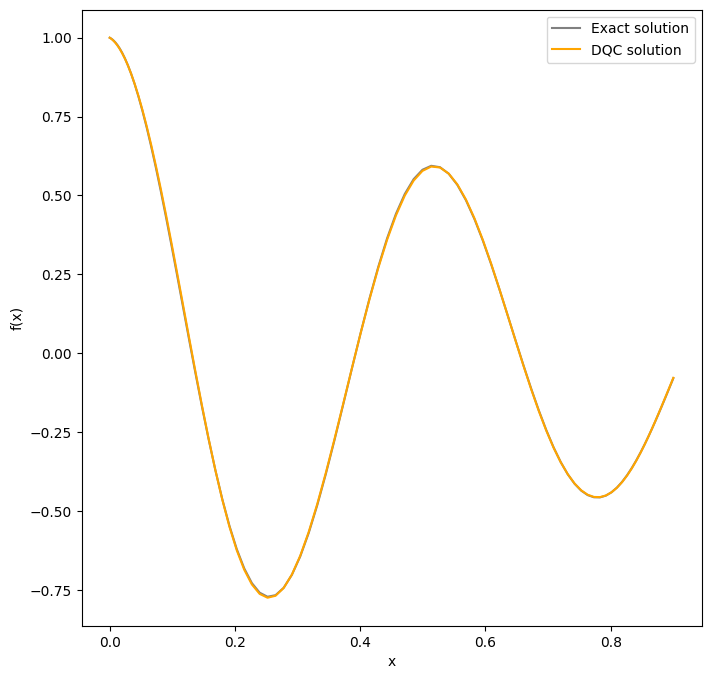

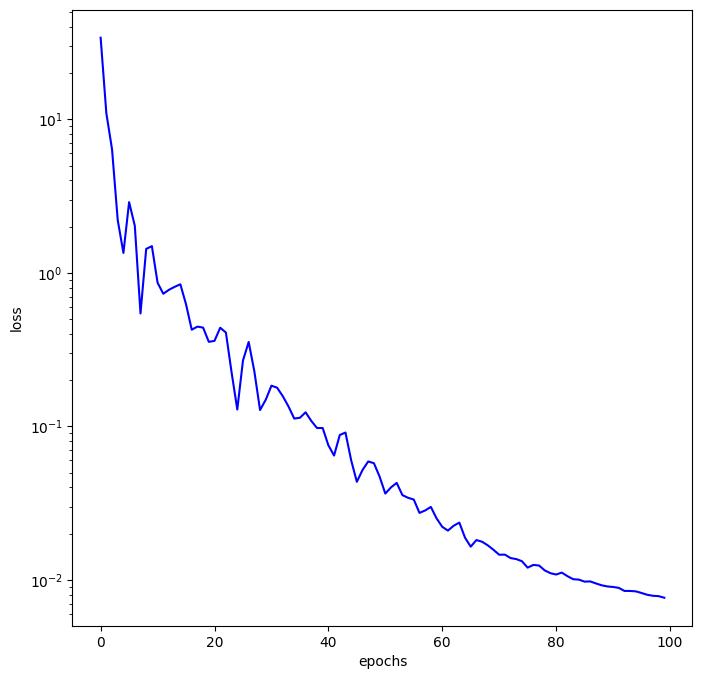

Seed id:  2
Learning rate:  0.1
k = 1
lamb = 12
Initial angles:  [0.18543459 0.04606304 0.1211122  0.3206495  0.59880521 0.94904842
 0.23660133 0.3528282  0.56762342 0.18725486 0.32925282 0.15156011
 0.88917541 0.36943815 0.7112264  0.03539684 0.93204042 0.86941313
 0.48395001 0.9677477  0.50565552 0.27738367 0.70064422 0.70119215
 0.42840841 0.83960359 0.89130283 0.59561829 0.45535092 0.97906291
 0.64924297 0.5251464  0.83775331 0.07896078 0.93860961 0.09977123
 0.094748   0.15404954 0.86220543 0.87796002 0.41937267 0.46860644
 0.29721592 0.88533824 0.44287442 0.41525635 0.32058252 0.71215064
 0.1878618  0.66971514 0.12041333 0.37695798 0.37914975 0.29745984
 0.0176442  0.24319964 0.52186684 0.20617971 0.22887152 0.19957958
 0.74472979 0.54736705 0.82476533 0.06567063 0.34957733 0.11960008
 0.51471923 0.81384159 0.98279899 0.62323401 0.37946488 0.65412096
 0.27315435 0.75664716 0.67970733 0.40759255 0.8204543  0.85068359
 0.3750638  0.58786968 0.35372556 0.24756854 0.00545275 0.088235

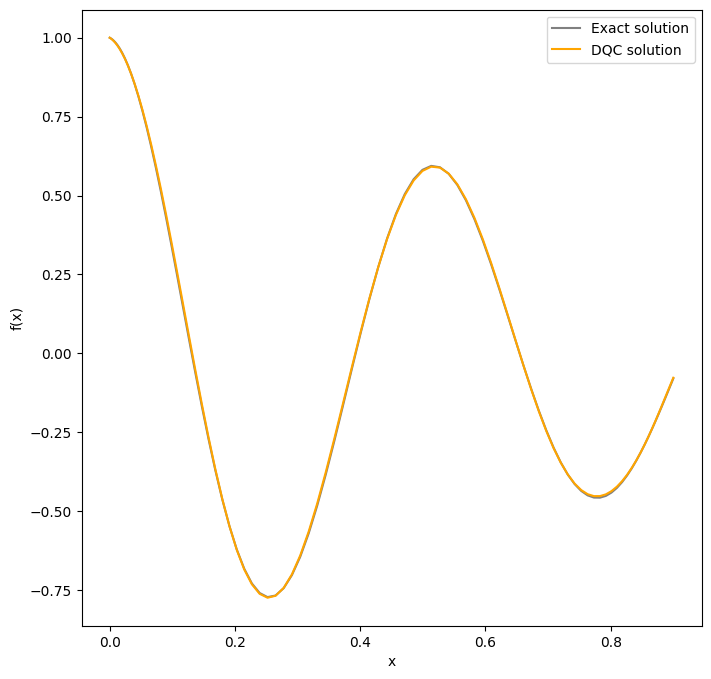

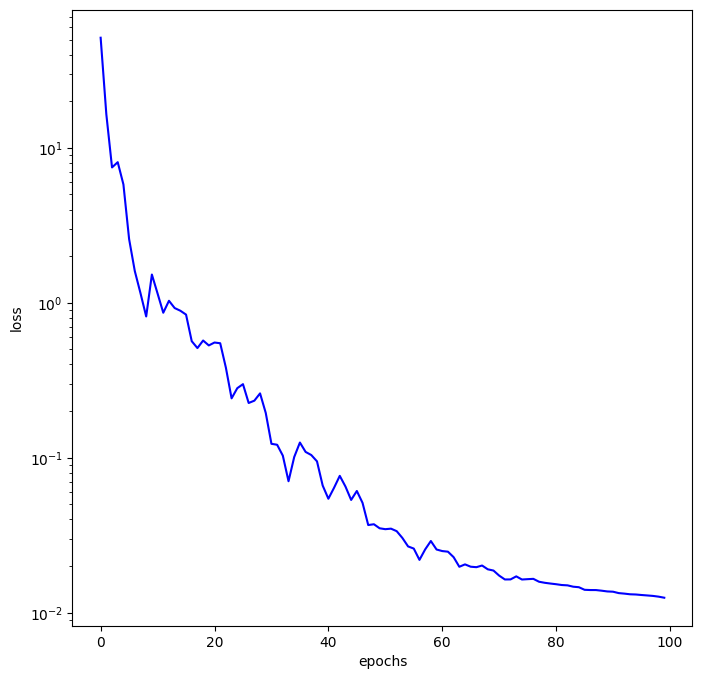

Seed id:  3
Learning rate:  0.1
k = 1
lamb = 12
Initial angles:  [0.14955737 0.75213325 0.80180799 0.37050175 0.00769417 0.89832511
 0.2823829  0.35230495 0.99286328 0.30935293 0.77717409 0.54672332
 0.75559176 0.29362426 0.7409304  0.74109475 0.58023792 0.82708304
 0.12615771 0.13680561 0.77252579 0.78596544 0.46843361 0.9366194
 0.83726176 0.01756585 0.78978066 0.54457654 0.79202707 0.34300942
 0.23716249 0.02271131 0.09256043 0.7896882  0.14206504 0.66456656
 0.42495514 0.55925565 0.84043938 0.35775972 0.56403126 0.59309497
 0.0956861  0.5782272  0.26333628 0.30781149 0.86004572 0.97864406
 0.84832804 0.28280992 0.75364427 0.0526717  0.36969264 0.87418612
 0.29864765 0.41591176 0.35202508 0.81759346 0.64153218 0.90314058
 0.84528484 0.40781469 0.54676922 0.33223548 0.82521946 0.38263329
 0.73294335 0.08120235 0.05595652 0.11604265 0.32914444 0.12234369
 0.64042565 0.63055502 0.86018632 0.30849328 0.07860108 0.74318754
 0.83448058 0.93797301 0.8380745  0.57925068 0.18223874 0.2282948

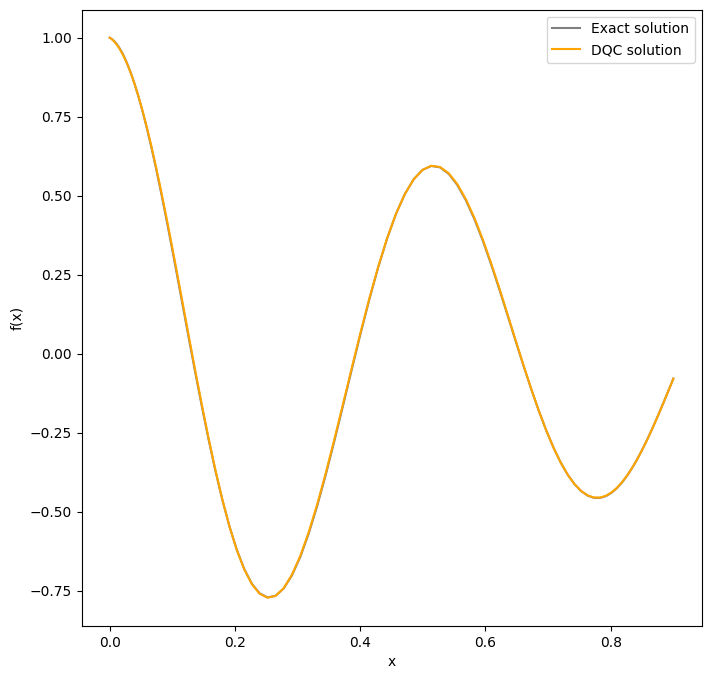

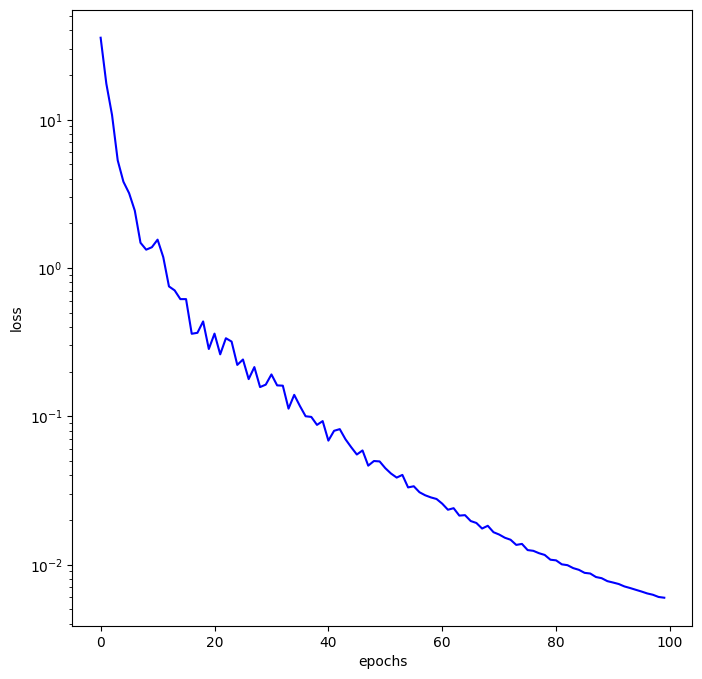

Seed id:  4
Learning rate:  0.1
k = 1
lamb = 12
Initial angles:  [0.01144863 0.25126531 0.41434199 0.73889191 0.73878448 0.35946564
 0.86074206 0.17402503 0.65576204 0.33572777 0.10179477 0.04660377
 0.49825474 0.75308137 0.08279422 0.52490841 0.13576491 0.20732145
 0.21070289 0.87431383 0.02367252 0.88709095 0.11298668 0.04090451
 0.85951587 0.0447459  0.66671013 0.93981634 0.65279042 0.54573974
 0.22999381 0.9436568  0.49203089 0.16457535 0.52044039 0.47427591
 0.31978545 0.94829407 0.09810659 0.2386561  0.88222572 0.45122646
 0.62784841 0.30364068 0.75624661 0.32699566 0.14771987 0.65013821
 0.99156375 0.13684084 0.1383988  0.34863422 0.79351312 0.78627729
 0.685699   0.33917472 0.20401128 0.35662205 0.35070513 0.57780555
 0.36988973 0.44377559 0.99718627 0.35296369 0.30243736 0.64274834
 0.83891316 0.94337906 0.22012851 0.6278591  0.57133369 0.1864434
 0.86335637 0.50385848 0.8883021  0.45162154 0.91718642 0.51409631
 0.73413531 0.96199752 0.80011655 0.97342322 0.43807158 0.4796622

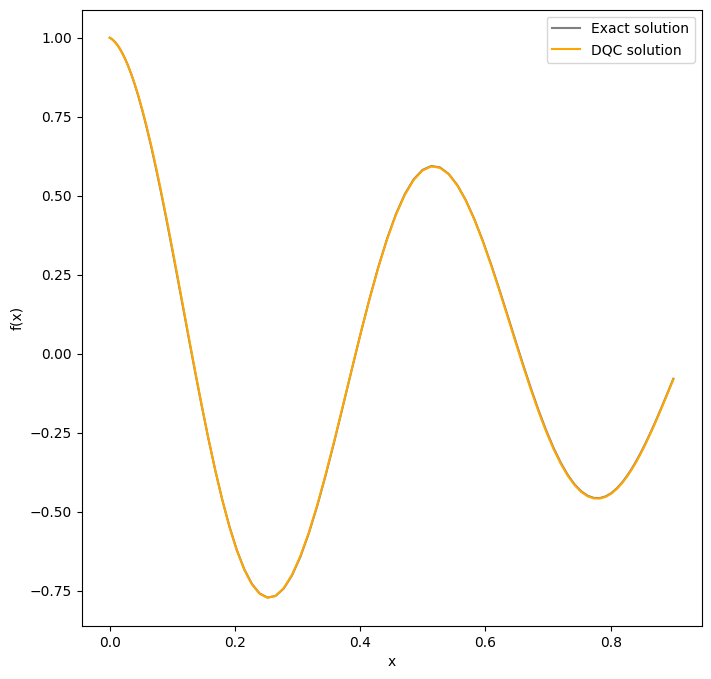

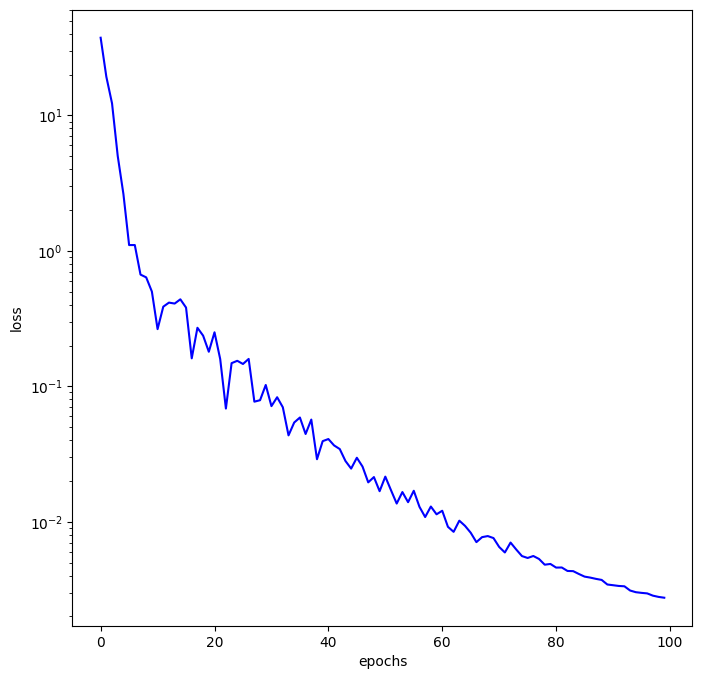

Seed id:  5
Learning rate:  0.1
k = 1
lamb = 12
Initial angles:  [0.43291866 0.46336125 0.90843623 0.59293226 0.65233062 0.42137721
 0.79713795 0.82897069 0.1428678  0.51412303 0.31278768 0.1720357
 0.77007819 0.71585125 0.82966258 0.98902545 0.77769275 0.92308515
 0.13703568 0.33072243 0.42838109 0.71376219 0.5025359  0.30821109
 0.34011465 0.18540963 0.78113824 0.90104761 0.55187649 0.93900727
 0.49336984 0.77938046 0.0969     0.52729684 0.12031017 0.83997141
 0.09267807 0.34934595 0.32324787 0.62748154 0.26909635 0.12408099
 0.95683046 0.06263893 0.60987731 0.65260265 0.44388887 0.44500835
 0.46904019 0.0777357  0.50990407 0.7190328  0.06281304 0.26742839
 0.80401735 0.56470567 0.42076228 0.37721765 0.44093779 0.93194283
 0.89932474 0.01629386 0.52730087 0.00346304 0.45694715 0.62632632
 0.24406507 0.93708863 0.48936239 0.63360066 0.97199507 0.79513854
 0.30390757 0.07455906 0.23223719 0.16314887 0.50043845 0.77300649
 0.96763564 0.53610791 0.26703816 0.73282948 0.30994236 0.9725102

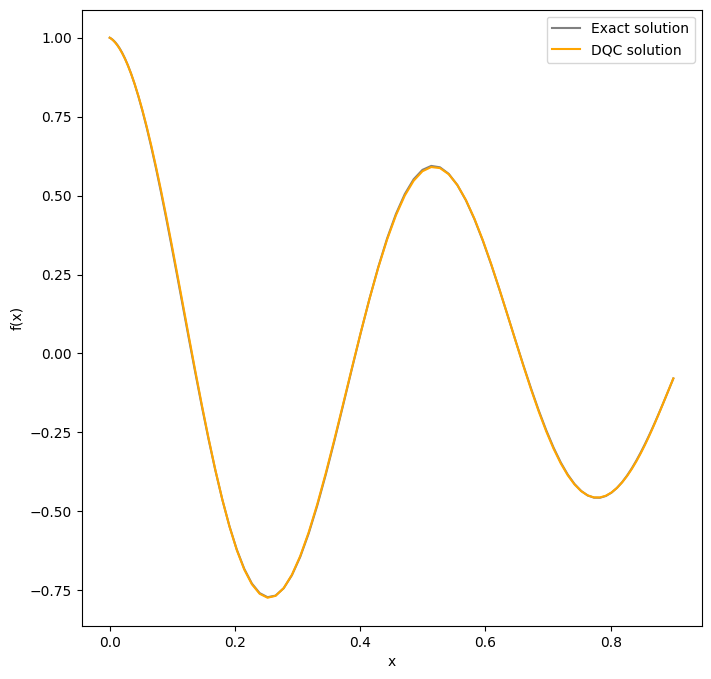

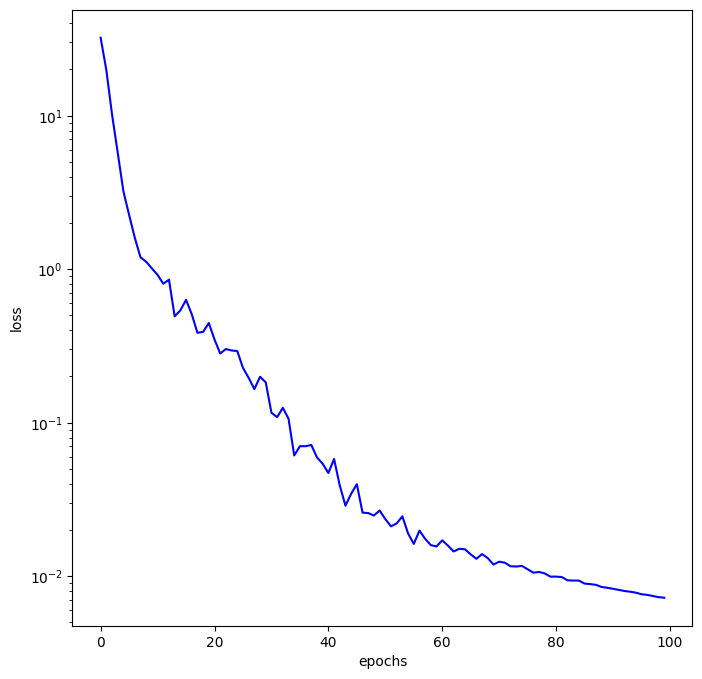

Seed id:  6
Learning rate:  0.1
k = 1
lamb = 12
Initial angles:  [0.61236479 0.18242121 0.62400456 0.41245735 0.69377064 0.32675189
 0.95753742 0.88098655 0.95006932 0.35643625 0.29437216 0.31428673
 0.95809089 0.89616637 0.27939736 0.20073101 0.08712688 0.78196257
 0.72285875 0.08675011 0.78407714 0.15268244 0.49506819 0.82398318
 0.33819473 0.82950609 0.21853748 0.98501174 0.43359006 0.56820558
 0.75221101 0.06749112 0.39101331 0.25997864 0.26990232 0.63367224
 0.57720752 0.23905517 0.48122201 0.47980774 0.88320988 0.90192506
 0.78255126 0.18845366 0.82545626 0.83517844 0.48805777 0.20098326
 0.45485848 0.44073906 0.2786114  0.56992899 0.06386321 0.50493969
 0.84073024 0.3798933  0.38059642 0.31844935 0.48761794 0.62743376
 0.20572468 0.69525775 0.577234   0.20287378 0.41123077 0.56199419
 0.19531128 0.98550134 0.21857447 0.28921223 0.50146453 0.67324782
 0.60497932 0.69421268 0.31631882 0.99084521 0.13230375 0.58639154
 0.20298523 0.972317   0.27923198 0.71149348 0.04111769 0.066925

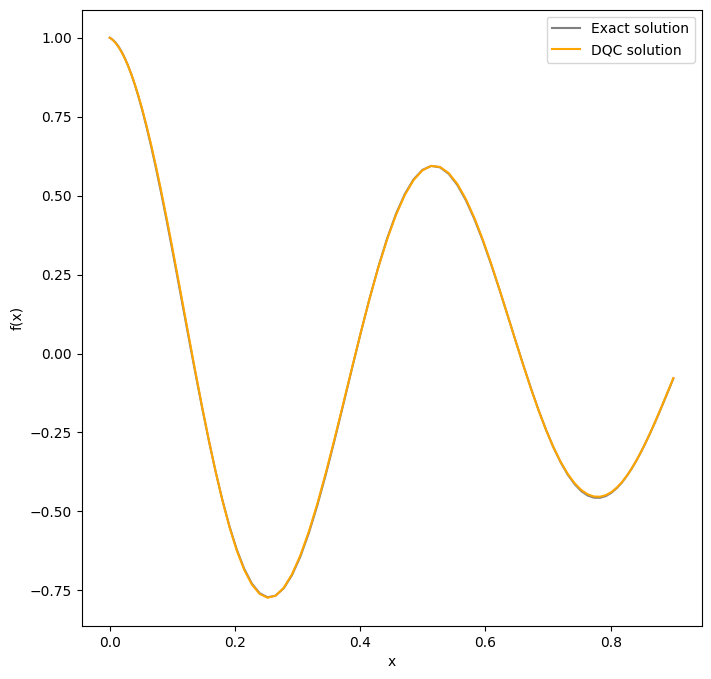

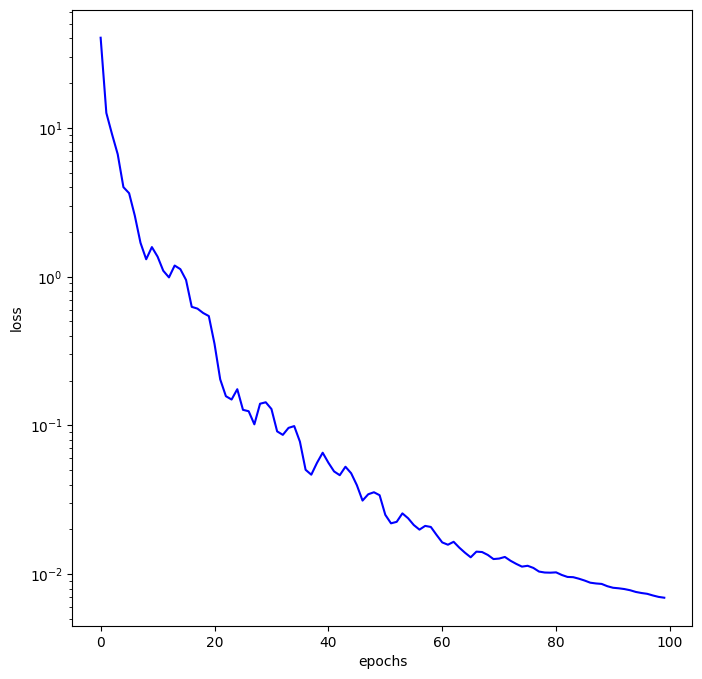

Seed id:  7
Learning rate:  0.1
k = 1
lamb = 12
Initial angles:  [0.33676676 0.80786703 0.85395614 0.39493031 0.05708134 0.86223527
 0.60988636 0.41346733 0.28247162 0.27596517 0.25994396 0.21607967
 0.86572261 0.61688903 0.61097909 0.93904208 0.98269615 0.18234727
 0.8194405  0.49503674 0.02333672 0.74222673 0.81506172 0.67906632
 0.83730837 0.51101969 0.11368021 0.07211304 0.41946173 0.64129159
 0.23553773 0.94218467 0.39843931 0.57075881 0.46253038 0.68376401
 0.31302281 0.63342853 0.39721857 0.04046074 0.95654053 0.81884864
 0.00132483 0.90013669 0.13512623 0.01750728 0.81297899 0.11884874
 0.14013248 0.24258044 0.91782463 0.96723438 0.21670229 0.81395512
 0.43511413 0.02535289 0.79209475 0.31537026 0.91207187 0.00838959
 0.66629863 0.30127704 0.32782149 0.0813939  0.39378027 0.3848854
 0.79222042 0.45938595 0.51996032 0.70898334 0.79023757 0.52475907
 0.22126503 0.67650816 0.0413236  0.69949414 0.54396546 0.83483707
 0.28038982 0.19621135 0.82941054 0.86381946 0.51966334 0.4079606

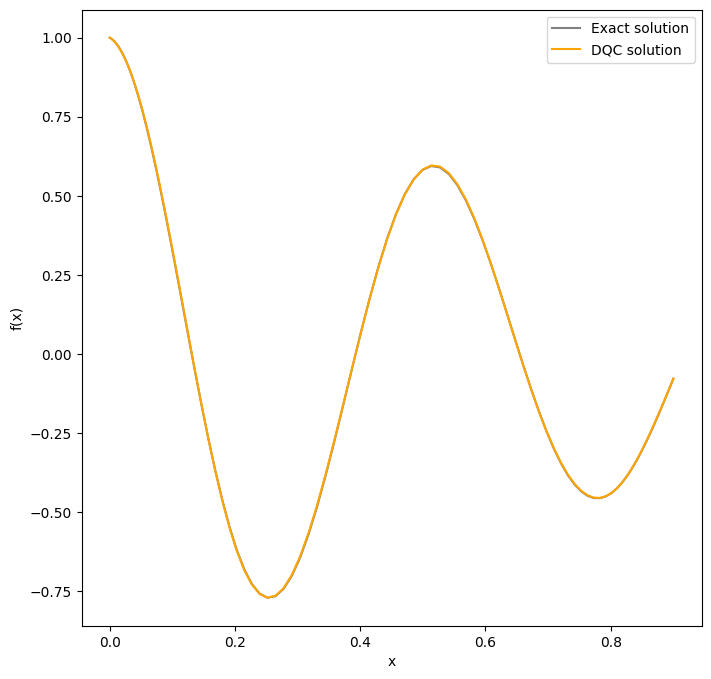

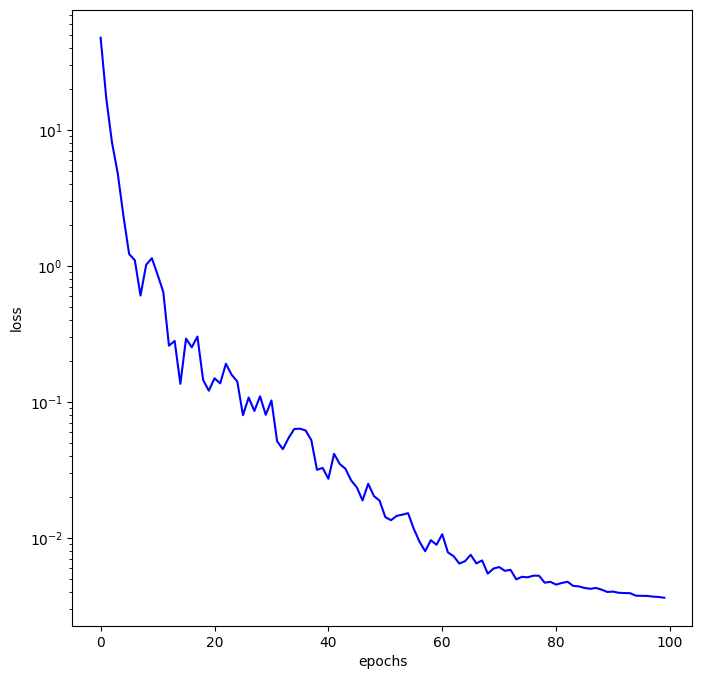

Seed id:  8
Learning rate:  0.1
k = 1
lamb = 12
Initial angles:  [0.87649543 0.64640183 0.24452496 0.75552464 0.63489043 0.4221048
 0.15950896 0.85175756 0.47605927 0.62843136 0.09496502 0.85073593
 0.96868933 0.75160837 0.57999912 0.54475295 0.30332641 0.34964977
 0.82305208 0.57871452 0.17826884 0.14171125 0.81131395 0.69970578
 0.38766836 0.85324355 0.38819598 0.33161469 0.18154439 0.76319741
 0.08545954 0.91227279 0.56836054 0.01399033 0.64208299 0.38943204
 0.6586386  0.78929766 0.02182469 0.42551314 0.78242741 0.28365156
 0.40751488 0.20174738 0.43744746 0.36944465 0.55573341 0.46036907
 0.09447821 0.44244748 0.00844621 0.84347844 0.45653748 0.87647476
 0.67505183 0.1882629  0.42391793 0.45198859 0.75585426 0.71651697
 0.00160596 0.27743019 0.75126826 0.22653744 0.37688543 0.16052672
 0.75555805 0.84928069 0.77990762 0.39925645 0.95614449 0.77299833
 0.76879683 0.64441668 0.32218507 0.23942734 0.90265948 0.51660805
 0.15854776 0.1177181  0.94227938 0.03271622 0.27093142 0.2979108

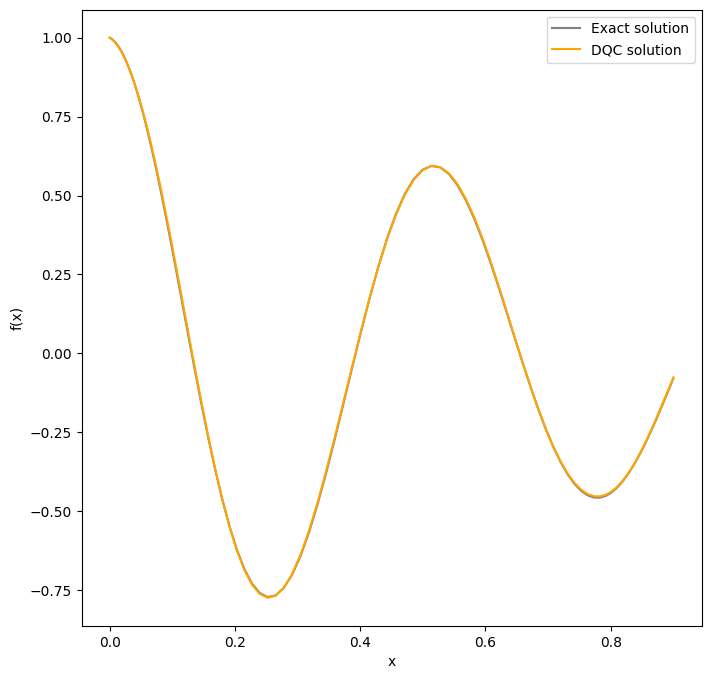

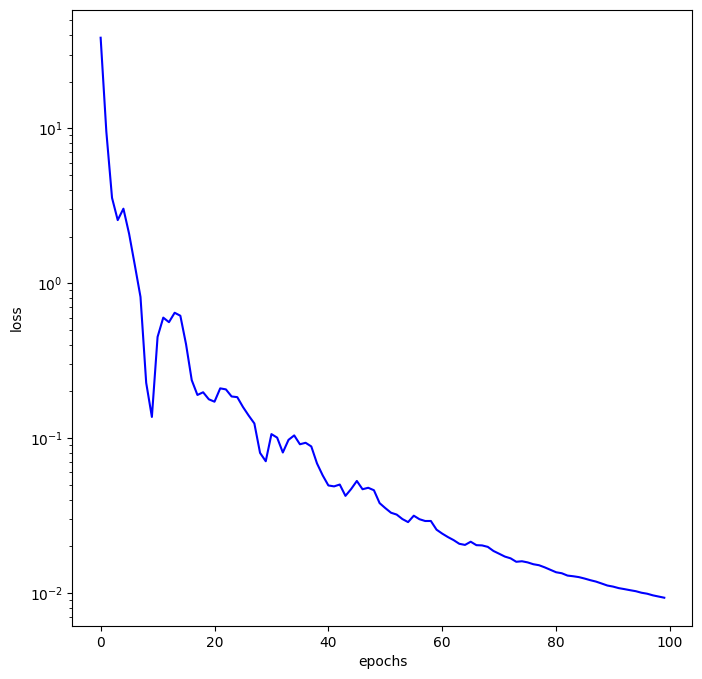

Seed id:  9
Learning rate:  0.1
k = 1
lamb = 12
Initial angles:  [0.35263051 0.57784019 0.19464458 0.60722869 0.89650585 0.37291713
 0.81691365 0.56552425 0.30878435 0.57277411 0.98288085 0.9908022
 0.22153054 0.01917392 0.2754529  0.74430405 0.74556338 0.5234873
 0.32012419 0.17809104 0.91199676 0.49390993 0.32276369 0.10425227
 0.4577813  0.3611968  0.83431427 0.62858862 0.30484289 0.61341464
 0.51955865 0.06162298 0.96539114 0.74031085 0.34085523 0.33240772
 0.38346711 0.29071006 0.71356206 0.97106845 0.44860018 0.1476474
 0.52703415 0.56191937 0.44714622 0.4447699  0.63559896 0.6717813
 0.55516692 0.99535738 0.88739048 0.83727976 0.36976253 0.0726111
 0.12443756 0.84040126 0.25778986 0.90459087 0.57411841 0.03875833
 0.23399876 0.59954183 0.69818419 0.5124692  0.90245007 0.28626572
 0.22923709 0.2620775  0.45870689 0.37326777 0.29513026 0.99738938
 0.87036155 0.03194127 0.96408177 0.44807651 0.33583721 0.64862331
 0.12353413 0.52888842 0.5944617  0.98009944 0.37701071 0.21616677
 0

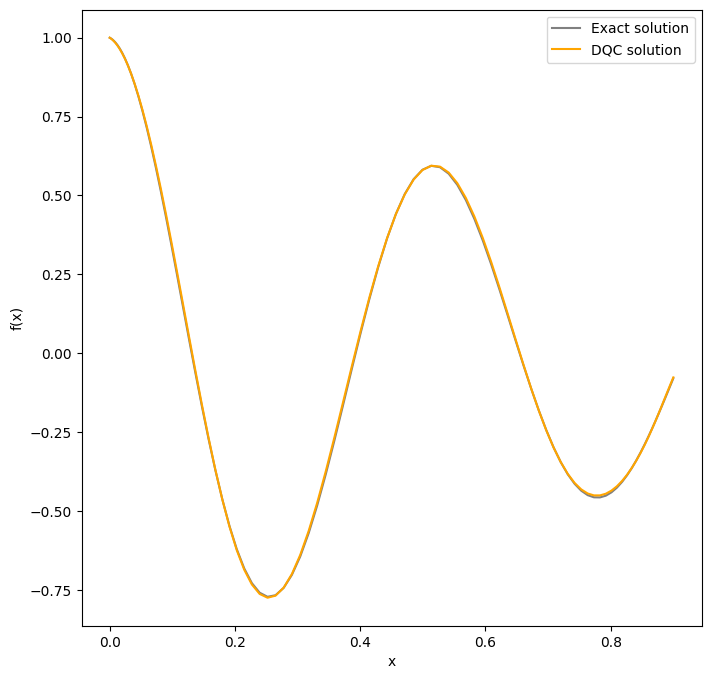

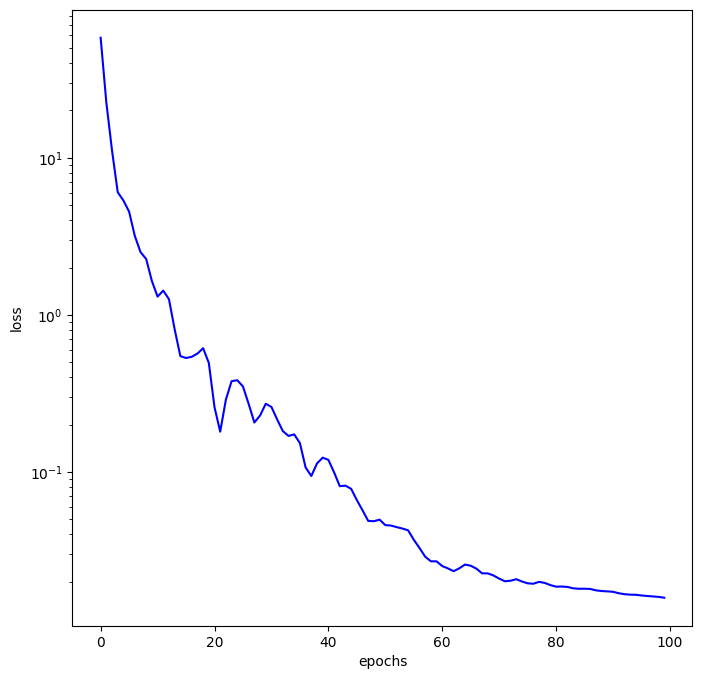

In [4]:
L_f = []
L_q = []
all_functions = []
all_losses = []
for state in range(len(RANDOM_STATES)):
    for lr in LEARNING_RATES:
        for k in K:
            for lamb in LAMBDA:
                print("Seed id: ",state)
                print("Learning rate: ",lr)
                print("k =",k)
                print("lamb =",lamb)


                ## SETTINGS ## 
                N_QUBITS, DEPTH, LEARNING_RATE, N_POINTS = 6, 5, lr, N_POINTS
                b = 1

                chebT = feature_map(n_qubits=N_QUBITS, param="x", op=RY, fm_type = BasisSet.CHEBYSHEV, reupload_scaling = ReuploadScaling.TOWER)
                fm = chebT

                torch.manual_seed(RANDOM_STATES[state])
                ansatz = hea(n_qubits=N_QUBITS, depth=DEPTH, operations=[RZ, RX, RZ])

                obs = total_magnetization(N_QUBITS) 

                circuit = QuantumCircuit(N_QUBITS, chain(fm, ansatz))
                model = QNN(circuit=circuit, observable=obs, inputs=["x"]) 
                
                inital_vparams = model.vparams
                #print("Inital params: ",inital_vparams)
                sorted_keys = sorted(inital_vparams.keys(), key=lambda k: int(k.split('_')[1]))
                inital_thetas = np.array([inital_vparams[k].item() for k in sorted_keys])
                inital_thetas = np.reshape(inital_thetas, (DEPTH, 3, N_QUBITS))
                Theta_init = np.transpose(inital_thetas, (2, 0, 1))
                theta_init = Theta_init.reshape(-1)
                print("Initial angles: ",theta_init)
                #check
                #Theta_init = np.reshape(theta_init, (N_QUBITS,DEPTH,3))
                #print("Theta: ",Theta_init)

                def loss_fn(inputs: torch.tensor, outputs: torch.tensor) -> torch.tensor:
                    boundary_loss = b*torch.ones_like(inputs) - model(torch.zeros_like(inputs))
                    outputs = outputs + boundary_loss

                    df = grad(outputs=outputs.sum(), inputs=inputs, create_graph=True)[0] 
                    g = k*outputs + lamb*torch.exp(-k*inputs)*torch.sin(lamb*inputs) 
                    ode_loss = (df+g).pow(2)
        
                    return ode_loss.mean(), outputs 


                ## TRAINING ##
                epochs = 100 
                opt = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
                losses = []
                for epoch in range(epochs):
                    opt.zero_grad()
            
                    cp = cp_fixed.clone().detach().requires_grad_(True)
                    
                    loss, f = loss_fn(inputs=cp, outputs=model(cp))
                    losses.append(loss.item())
                
                    #if (epoch % 50 == 0):
                    u = torch.exp(-k*cp.detach())*torch.cos(lamb*cp.detach()).detach().numpy()  
                    l_q = torch.sum((u-f.detach().numpy())**2)/N_POINTS
                    print(epoch, (loss.item(), l_q.item()))

                    loss.backward()
                    opt.step()


                ## TESTING ##
                analytic_sol = torch.exp(-k*sample_points.detach())*torch.cos(lamb*sample_points.detach()).detach().numpy() 

                dqc_sol = (model(sample_points) + b*torch.ones_like(sample_points)-model(torch.zeros_like(sample_points))).detach().numpy() 
                x_data = sample_points.detach().numpy()

                plt.figure(figsize=(8, 8))
                plt.plot(x_data, analytic_sol.flatten(), color="gray", label="Exact solution")
                plt.plot(x_data, dqc_sol.flatten(), color="orange", label="DQC solution")
                plt.xlabel("x")
                plt.ylabel("f(x)")
                plt.legend()
                #plt.savefig(f"f_x_{state}_{lr}_{k}_{lamb}.png")
                plt.show()

                plt.figure(figsize=(8, 8))
                plt.plot(losses, color="blue")
                plt.xlabel("epochs")
                plt.ylabel("loss")
                plt.yscale('log')
                #plt.savefig(f"losses_{state}_{lr}_{k}_{lamb}.png")
                plt.show()

                L_f.append(losses[-1])
                L_q.append(torch.sum((analytic_sol-dqc_sol)**2) /len(sample_points))
                all_functions.append(dqc_sol.flatten())
                all_losses.append(losses)

In [5]:
print("L_f: ",L_f)
print()
L_q = [q.item() for q in L_q]
print("L_q: ",L_q)

L_f:  [0.013855074737874135, 0.00765493612437852, 0.012489062448122831, 0.005972418261712165, 0.002749904674234573, 0.007237158993167278, 0.006942642876295656, 0.0036196754257439416, 0.009294134209157954, 0.015809911550603607]

L_q:  [3.6059592771597244e-05, 7.838521536767605e-06, 1.5806014873617567e-05, 7.889886462441143e-06, 6.023013919187349e-06, 7.437456060359019e-06, 8.021774473131612e-06, 3.909899668081878e-06, 1.4139107781707748e-05, 2.0162100045544722e-05]


### Best solutions

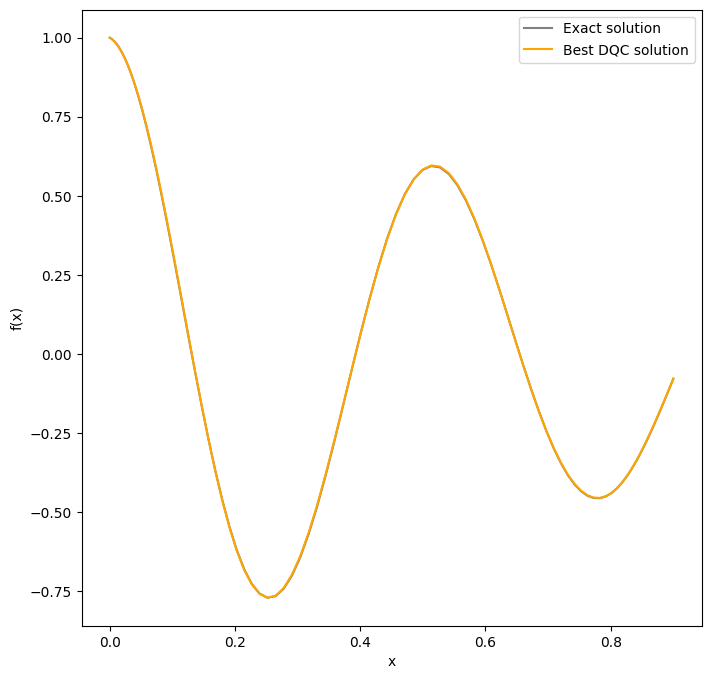

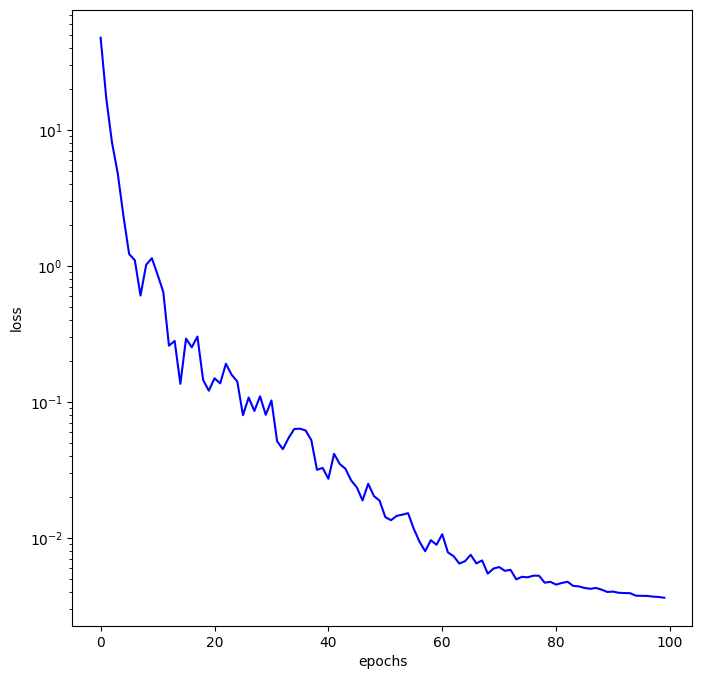


Top 10 indices (sorted by L_q): 
1. Index 7, L_f = 0.003620, L_q = 0.000004
2. Index 4, L_f = 0.002750, L_q = 0.000006
3. Index 5, L_f = 0.007237, L_q = 0.000007
4. Index 1, L_f = 0.007655, L_q = 0.000008
5. Index 3, L_f = 0.005972, L_q = 0.000008
6. Index 6, L_f = 0.006943, L_q = 0.000008
7. Index 8, L_f = 0.009294, L_q = 0.000014
8. Index 2, L_f = 0.012489, L_q = 0.000016
9. Index 9, L_f = 0.015810, L_q = 0.000020
10. Index 0, L_f = 0.013855, L_q = 0.000036


In [6]:
# Step 1: Collect all entries
all_entries = [(i, L_f[i], L_q[i]) for i in range(len(L_q))]

# Step 2: Sort by L_q only
top_10 = sorted(all_entries, key=lambda x: x[2])[:10]

# Step 3: Use the best one (lowest L_q) for plotting
best_index = top_10[0][0]
best_L_f = top_10[0][1]
best_L_q = top_10[0][2]
best_solution = all_functions[best_index]
best_loss = all_losses[best_index]

plt.figure(figsize=(8, 8))
plt.plot(x_data, analytic_sol.flatten(), color="gray", label="Exact solution")
plt.plot(x_data, best_solution.flatten(), color="orange", label="Best DQC solution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.savefig(f"best_f_x.png")
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(best_loss, color="blue")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log')
plt.savefig(f"best_losses.png")
plt.show()

# Print top 10 indices
print("\nTop 10 indices (sorted by L_q): ")
for rank, (i, lf, lq) in enumerate(top_10, 1):
    print(f"{rank}. Index {i}, L_f = {lf:.6f}, L_q = {lq:.6f}")

### Mean solution

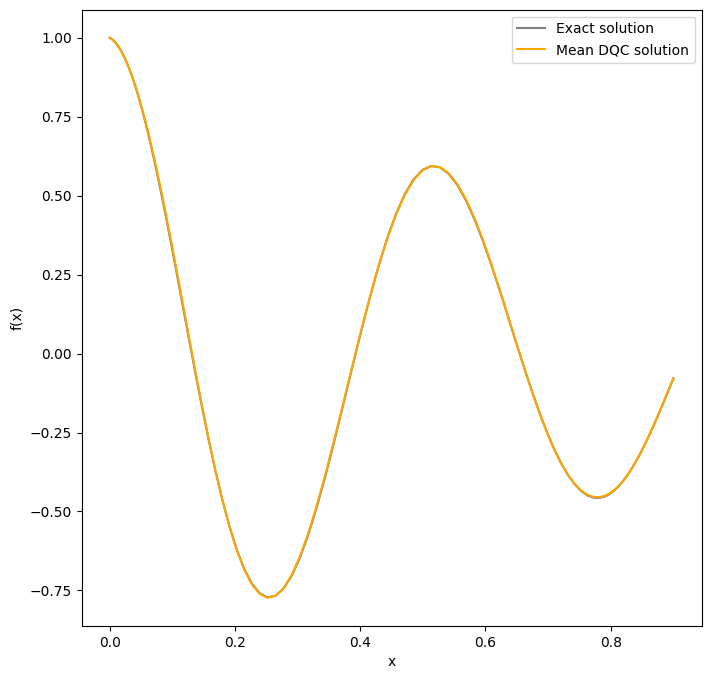

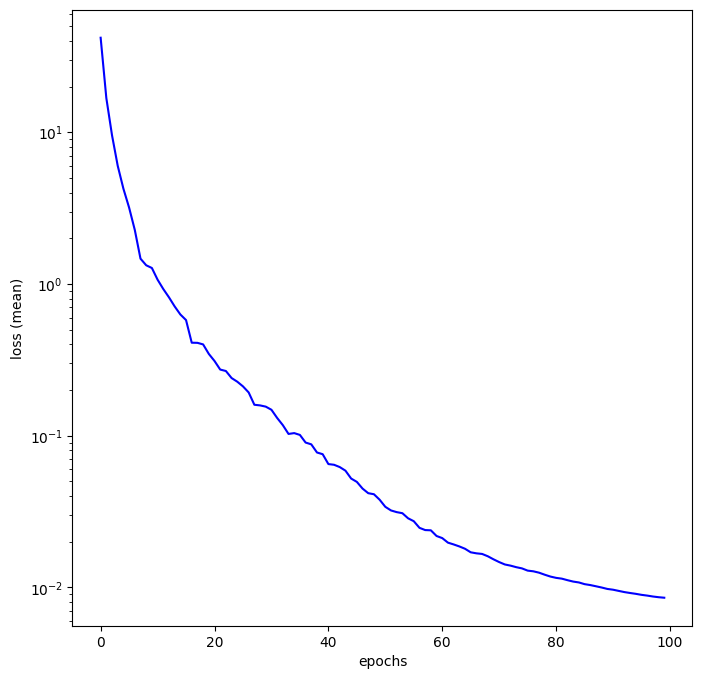

Preds std:  0.0019303075992869925
Mean L_f:  0.008562491930129066
Mean L_q:  1.2728736759243589e-05


In [7]:
mean_loss = np.mean(all_losses, axis=0)
mean_solution = np.mean(all_functions, axis=0)
mean_L_f = np.mean(L_f, axis=0)
mean_L_q = np.mean(L_q, axis=0)

plt.figure(figsize=(8, 8))
plt.plot(x_data, analytic_sol.flatten(), color="gray", label="Exact solution")
plt.plot(x_data, mean_solution.flatten(), color="orange", label="Mean DQC solution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.savefig("mean_f_x.png")
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(mean_loss, color="blue")
plt.xlabel("epochs")
plt.ylabel("loss (mean)")
plt.yscale('log')
plt.savefig("mean_losses.png")
plt.show()

print("Preds std: ",np.sqrt(np.mean(np.std(all_functions, axis=0)**2)))
print("Mean L_f: ",mean_L_f)
print("Mean L_q: ",mean_L_q)

### Stats

In [8]:
L_f_threshold = 10**(-1)
L_q_threshold = 10**(-4) 
count = sum(1 for f, q in zip(L_f, L_q) if f < L_f_threshold and q < L_q_threshold)

print("Number of good solutions: ",count) 

Number of good solutions:  10


In [9]:
print("Number of good L_f: ",sum(1 for f in L_f if f < L_f_threshold)) 
print("Number of good L_q: ",sum(1 for q in L_q if q < L_q_threshold))

Number of good L_f:  10
Number of good L_q:  10
